# Sentiment Analysis Using Convolutional Neural Networks

### Implementing a 1D convnet

In [1]:
import tensorflow as tf
print("TensorFlow version: " + tf.__version__)

TensorFlow version: 2.0.0


In [2]:
import keras
print("Keras version: " + keras.__version__)

Keras version: 2.3.0


Using TensorFlow backend.


### Processing the labels of the raw movie data

In [3]:
import os

movies_dir = '/Users/jrmth/Desktop/Notebooks/Sentiment Analysis/aclImdb/'
movies_train_dir = os.path.join(movies_dir, 'train')

movie_labels = []
movie_texts = []

for label_type in ['neg', 'pos']:
    movie_dir_name = os.path.join(movies_train_dir, label_type)
    for fname in os.listdir(movie_dir_name):
        if fname[-4:] == '.txt':
            file = os.path.join(movie_dir_name, fname)
            movie_file = open(file, encoding="utf8")
            movie_texts.append(movie_file.read())
            movie_file.close()
            if label_type == 'neg':
                movie_labels.append(0)
            else:
                movie_labels.append(1)

### Tokenizing the text of the raw movie data

In [4]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
import numpy as np

# We'll cut reviews after 200 words
maxlen = 200

# We'll be training on 12500 samples
movie_training_samples = 12500

# We'll be validating on 15000 samples
movie_validation_samples = 15000

# We'll only consider the top 15000 words in the dataset
max_words = 15000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(movie_texts)
sequences = tokenizer.texts_to_sequences(movie_texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

movie_data = pad_sequences(sequences, maxlen=maxlen)

movie_labels = np.asarray(movie_labels)
print('Tensor shape for data:', movie_data.shape)
print('Tensor shape for label:', movie_labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(movie_data.shape[0])
np.random.shuffle(indices)
movie_data = movie_data[indices]
movie_labels = movie_labels[indices]

movie_data_train = movie_data[:movie_training_samples]

movie_labels_train = movie_labels[:movie_training_samples]

movie_data_val = movie_data[movie_training_samples: movie_training_samples + 
                            movie_validation_samples]
movie_labels_val = movie_labels[movie_training_samples: movie_training_samples + 
                                movie_validation_samples]

print(len(movie_data_train), 'train sequences')
print(len(movie_data_val), 'test sequences')

print('Pad sequences (samples x time)')
movie_data_train = sequence.pad_sequences(movie_data_train, maxlen=maxlen)
movie_data_val = sequence.pad_sequences(movie_data_val, maxlen=maxlen)
print('movie_data_train shape:', movie_data_train.shape)
print('movie_data_val shape:', movie_data_val.shape)

Found 88582 unique tokens.
Tensor shape for data: (25000, 200)
Tensor shape for label: (25000,)
12500 train sequences
12500 test sequences
Pad sequences (samples x time)
movie_data_train shape: (12500, 200)
movie_data_val shape: (12500, 200)


### Define a model

In [5]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

conv1D_model = Sequential()
conv1D_model.add(layers.Embedding(max_words, 128, input_length=maxlen))
conv1D_model.add(layers.Conv1D(32, 7, activation='relu'))
conv1D_model.add(layers.MaxPooling1D(5))
conv1D_model.add(layers.Conv1D(32, 7, activation='relu'))
conv1D_model.add(layers.GlobalMaxPooling1D())
conv1D_model.add(layers.Dense(1))

conv1D_model.summary()

conv1D_model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = conv1D_model.fit(movie_data_train, movie_labels_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)
conv1D_model.save_weights('conv1D_model.h5')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 128)          1920000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 194, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 38, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 32, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,955,937
Trainable params: 1,955,937
Non-trainable params: 0
____________________________________________

C:\Users\jrmth\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 10000 samples, validate on 2500 samples
Epoch 1/10
10000/10000 [==============================] - 16s 2ms/step - loss: 0.7410 - acc: 0.5051 - val_loss: 0.6931 - val_acc: 0.5208
Epoch 2/10
10000/10000 [==============================] - 15s 2ms/step - loss: 0.6734 - acc: 0.6365 - val_loss: 0.6880 - val_acc: 0.5348
Epoch 3/10
10000/10000 [==============================] - 16s 2ms/step - loss: 0.6527 - acc: 0.7805 - val_loss: 0.6773 - val_acc: 0.5748
Epoch 4/10
10000/10000 [==============================] - 15s 2ms/step - loss: 0.6299 - acc: 0.8361 - val_loss: 0.6682 - val_acc: 0.6400
Epoch 5/10
10000/10000 [==============================] - 19s 2ms/step - loss: 0.6042 - acc: 0.8817 - val_loss: 0.6493 - val_acc: 0.7108
Epoch 6/10
10000/10000 [==============================] - 15s 2ms/step - loss: 0.5716 - acc: 0.8972 - val_loss: 0.6231 - val_acc: 0.7168
Epoch 7/10
10000/10000 [==============================] - 15s 2ms/step - loss: 0.5275 - acc: 0.8916 - val_loss: 0.5852 - val_acc:

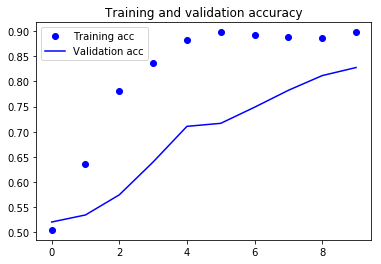

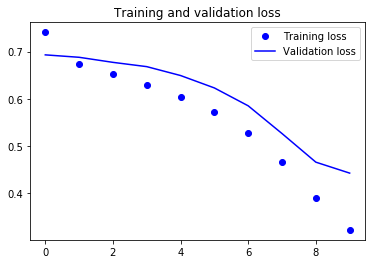

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt

accuracy = history.history['acc']
validation_accuracy = history.history['val_acc']
loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, validation_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
movie_test_dir = os.path.join(movies_dir, 'test')

movie_labels = []
movie_texts = []

for label_type in ['neg', 'pos']:
    movie_dir_name = os.path.join(movie_test_dir, label_type)
    for fname in sorted(os.listdir(movie_dir_name)):
        if fname[-4:] == '.txt':
            movie_file = open(os.path.join(movie_dir_name, fname), encoding="utf8")
            movie_texts.append(movie_file.read())
            movie_file.close()
            if label_type == 'neg':
                movie_labels.append(0)
            else:
                movie_labels.append(1)
                
sequences = tokenizer.texts_to_sequences(movie_texts)
movie_data_test = pad_sequences(sequences, maxlen=maxlen)
movie_labels_test = np.asarray(movie_labels)

In [8]:
conv1D_model.load_weights('conv1D_model.h5')
conv1D_model.evaluate(movie_data_test, movie_labels_test)

25000/25000 [==============================] - 8s 309us/step


[0.4393421235561371, 0.8149200081825256]